## Case Study for Lending club Credit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_data = pd.read_csv("loan.csv", low_memory = False)

In [3]:
credit_data.shape

(39717, 111)

#### Basic description of the credit_data dataframe
Based on the basic description we find that many of the columns have only NaN values; dropping all these unnecessary columns

In [4]:
credit_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
toRemove = set()
naNumbersPerColumn = credit_data.isnull().sum()
for i in naNumbersPerColumn.index:
    if(naNumbersPerColumn[i] == 39717):
         toRemove.add(i)
for i in toRemove:
    credit_data.drop(i, axis=1, inplace=True)

In [6]:
credit_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


#### Sanitize the data
1. Consider all the employment length to be between 0 to 10 years(anything less than 1 consider as 0; anything greater than 10 consider as 10
2. Stripping of the months from the term column
4. Converting int rate from string to numerical value

In [7]:
credit_data['emp_length'] = credit_data['emp_length'].astype(str).map(lambda x : x.rstrip('+ years'))
credit_data['emp_length'] = credit_data['emp_length'].astype(str).map(lambda x : 0 if x == '< 1' else x)
credit_data['emp_length'] = credit_data['emp_length'].astype(float)

credit_data['term'] = credit_data['term'].map(lambda x : x.rstrip(' months'))

credit_data.rename(columns = {'emp_length':'emp_len_years', 'term':'term_months'}, inplace = True)

credit_data['int_rate'] = credit_data['int_rate'].astype(str).map(lambda x : x.rstrip('%'))
credit_data['int_rate'] = credit_data['int_rate'].astype(float)

credit_data['revol_util'] = credit_data['revol_util'].astype(str).map(lambda x : x.rstrip('%'))
credit_data['revol_util'] = credit_data['revol_util'].astype(float)

#### Creating a derived column : Adding a column to check about loan default

In [8]:
cols = credit_data.columns
cols
credit_data[cols] = credit_data[cols].replace('n/a', np.NaN)

In [9]:
credit_data['defaulted'] = credit_data['loan_status'].map(lambda x : 1 if x == 'Charged Off' else 0)

#### Creating a derived column : Adding a column for the loan issued year

In [10]:
credit_data['issue_d']=pd.to_datetime(credit_data.issue_d.str.upper(), format='%b-%y', yearfirst=False)
credit_data['issue_d_year']=pd.DatetimeIndex(credit_data['issue_d'].values).year

In [11]:
credit_data['issue_d_year'].value_counts()

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64

#### Deletion of irrelevant data
For checking credit risk of the customer some the information such as address info, url of the account, purpose are not needed; hence deleting all the irrelevant columns from the data frame. Columns are dropped based on the following paramters:
1. Whether the information is available at the time of deciding whether to give the loan or not (
    a. funded_amnt
    b. funded_amnt_inv
    c. out_prncp
    d. out_prncp_inv
    e. total_pymnt
    f. total_pymnt_inv
    g. total_rec_prncp
    h. total_rec_int
    i. total_rec_late_fee
    j. recoveries
    k. collection_recovery_fee
    l. last_pymnt_d
    m. last_pymnt_amnt)
2. Whether the information has any relevance while doing the risk assessment(
    a. id
    b. member_id
    c. url
    d. desc
    e. title
    f. emp_title
    g. application_type; all data is INDIVIDUAL)
    
3. Contains redundant information(
   a. sub_grade)

In [12]:
credit_data.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'url',
                  'sub_grade', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                  'zip_code', 'desc', 'title', 'emp_title',
                  'policy_code', 'pymnt_plan', 'application_type',
                 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'
                 ], axis = 1, inplace = True)

In [13]:
credit_data.isnull().sum()

loan_amnt                         0
term_months                       0
int_rate                          0
installment                       0
grade                             0
emp_len_years                  1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
initial_list_status               0
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med  

### As majority of the data is missing for the following columns; drop the same:
1. mths_since_last_delinq
2. mths_since_last_record
3. next_pymnt_d

In [14]:
credit_data.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis = 1, inplace = True)

In [15]:
credit_data.shape

(39717, 32)

#### Fix missing values for the data set

 Set values as missing values: Identify values that indicate missing data, and yet are not recognised by the software as such, e.g treat blank strings, "NA", "XX", "999", etc. as missing.                                                                   
 Adding is good, exaggerating is bad: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to keep missing values as such rather than exaggerating the existing rows/columns.              
 <h5> Delete rows, columns: Rows could be deleted if the number of missing values are significant in number, as this would not      impact the analysis. Columns could be removed if the missing values are quite significant in number.</h5>

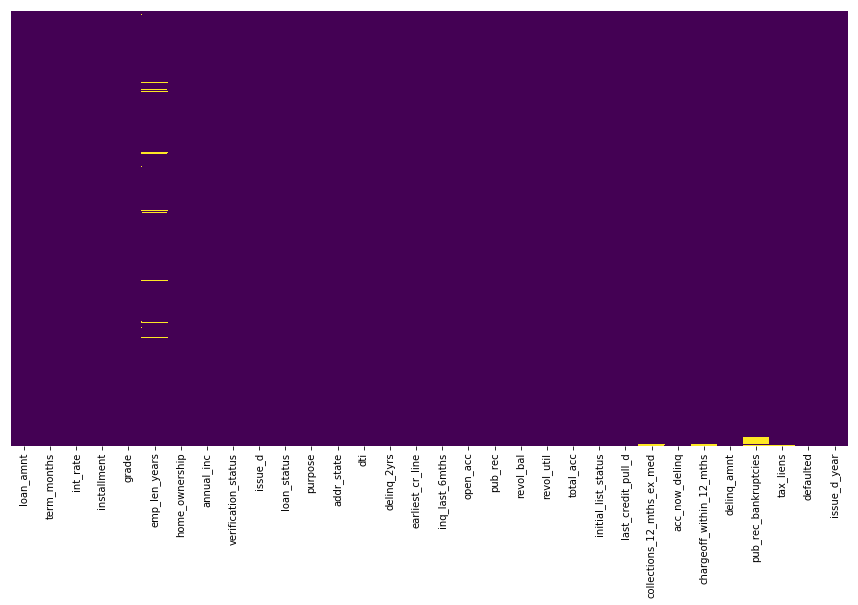

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(credit_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [17]:
# function to create a new dataset with column name and its data type and variable type whether as float,continuous or int
def f5_variabletype(data):
    colname=data.columns
    coltype=data.dtypes
    variabletype=[]
    for i in data:
        if (data[i].nunique()>8) and (data[i].dtype=='int64' or data[i].dtype=='float64'):
            variabletype.append('Continuous')
        #elif (data[i].nunique()<=8):
         #   variabletype.append('Class')
        else:
            variabletype.append('Class')
    variabletype
    dict={'ColumnName':colname,
         'Column_dtype':coltype,
          'Variable_Type':variabletype}
    return pd.DataFrame(dict)

In [18]:
f5_variabletype(credit_data)

,ColumnName,Column_dtype,Variable_Type
loan_amnt,loan_amnt,int64,Continuous
term_months,term_months,object,Class
int_rate,int_rate,float64,Continuous
installment,installment,float64,Continuous
grade,grade,object,Class
emp_len_years,emp_len_years,float64,Continuous
home_ownership,home_ownership,object,Class
annual_inc,annual_inc,float64,Continuous
verification_status,verification_status,object,Class
issue_d,issue_d,datetime64[ns],Class


#### Fill partial missing values using business judgement: Continuous with median and categorical with mode. These values are easily identifiable.

In [19]:
#if there are null value, then replace continuous with MEDIAN and categorical with MODE
def f6_NullValueTreatment(data):
    typedf=f5_variabletype(data)
    for i in data:
        if typedf.loc[i,'Variable_Type'] is'Continuous':
            data[i].fillna(value=data[i].median(),inplace=True)
        elif typedf.loc[i,'Variable_Type'] is'Class':
            data[i].fillna(value=data[i].mode().loc[0],inplace=True)
    return data

In [20]:
f6_NullValueTreatment(credit_data)

,loan_amnt,term_months,int_rate,installment,grade,emp_len_years,home_ownership,annual_inc,verification_status,issue_d,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,defaulted,issue_d_year
0,5000,36,10.65,162.87,B,10.0,RENT,24000.00,Verified,2011-12-01,...,f,May-16,0.0,0,0.0,0,0.0,0.0,0,2011
1,2500,60,15.27,59.83,C,0.0,RENT,30000.00,Source Verified,2011-12-01,...,f,Sep-13,0.0,0,0.0,0,0.0,0.0,1,2011
2,2400,36,15.96,84.33,C,10.0,RENT,12252.00,Not Verified,2011-12-01,...,f,May-16,0.0,0,0.0,0,0.0,0.0,0,2011
3,10000,36,13.49,339.31,C,10.0,RENT,49200.00,Source Verified,2011-12-01,...,f,Apr-16,0.0,0,0.0,0,0.0,0.0,0,2011
4,3000,60,12.69,67.79,B,1.0,RENT,80000.00,Source Verified,2011-12-01,...,f,May-16,0.0,0,0.0,0,0.0,0.0,0,2011
5,5000,36,7.90,156.46,A,3.0,RENT,36000.00,Source Verified,2011-12-01,...,f,Jan-16,0.0,0,0.0,0,0.0,0.0,0,2011
6,7000,60,15.96,170.08,C,8.0,RENT,47004.00,Not Verified,2011-12-01,...,f,May-16,0.0,0,0.0,0,0.0,0.0,0,2011
7,3000,36,18.64,109.43,E,9.0,RENT,48000.00,Source Verified,2011-12-01,...,f,Dec-14,0.0,0,0.0,0,0.0,0.0,0,2011
8,5600,60,21.28,152.39,F,4.0,OWN,40000.00,Source Verified,2011-12-01,...,f,Aug-12,0.0,0,0.0,0,0.0,0.0,1,2011
9,5375,60,12.69,121.45,B,0.0,RENT,15000.00,Verified,2011-12-01,...,f,Mar-13,0.0,0,0.0,0,0.0,0.0,1,2011


In [21]:
(credit_data.isnull().sum(axis=1)/credit_data.shape[1])*100

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
39687    0.0
39688    0.0
39689    0.0
39690    0.0
39691    0.0
39692    0.0
39693    0.0
39694    0.0
39695    0.0
39696    0.0
39697    0.0
39698    0.0
39699    0.0
39700    0.0
39701    0.0
39702    0.0
39703    0.0
39704    0.0
39705    0.0
39706    0.0
39707    0.0
39708    0.0
39709    0.0
39710    0.0
39711    0.0
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

#### Remove outliers: Remove high and low values that would disproportionately affect the results of your analysis.

In [22]:
credit_data.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1.0])

,loan_amnt,int_rate,installment,emp_len_years,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,defaulted,issue_d_year
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.0,39717.0,39717.0,39717.0,39717.000000,39717.0,39717.000000,39717.000000
mean,11219.443815,12.021177,324.561922,4.947101,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,...,48.832741,22.088828,0.0,0.0,0.0,0.0,0.042501,0.0,0.141677,2010.328902
std,7456.670694,3.724825,208.874874,3.517584,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,...,28.314798,11.401709,0.0,0.0,0.0,0.0,0.202603,0.0,0.348723,0.877514
min,500.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2007.000000
10%,3200.000000,7.140000,99.450000,0.000000,3.000000e+04,4.080000,0.000000,0.000000,4.000000,0.000000,...,8.600000,9.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2009.000000
20%,5000.000000,7.900000,150.800000,2.000000,3.750000e+04,6.980000,0.000000,0.000000,6.000000,0.000000,...,20.200000,12.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2010.000000
30%,6000.000000,9.990000,187.080000,2.000000,4.500000e+04,9.290000,0.000000,0.000000,7.000000,0.000000,...,30.500000,15.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2010.000000
40%,8000.000000,10.990000,231.370000,3.000000,5.040000e+04,11.380000,0.000000,0.000000,8.000000,0.000000,...,40.200000,18.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2010.000000
50%,10000.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,...,49.300000,20.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2011.000000
60%,12000.000000,12.870000,330.642000,5.000000,6.584440e+04,15.360000,0.000000,1.000000,10.000000,0.000000,...,58.300000,23.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,2011.000000


### Univariate Analysis

#### Let us first check the loan amount values

From the basic description of the credit data we can get the following observation:
1. Mean
2. Min
3. Max
4. Standard Deviation
5. 25 Percentile
6. 50 Percentile
7. 75 Percentile

Let us plot a distribution plot for the loan amount.

In [23]:
credit_data.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

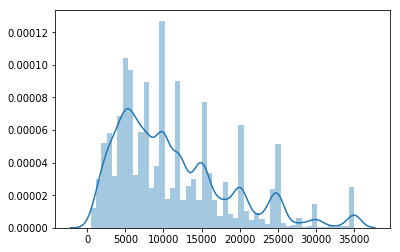

In [24]:
loan_amount = credit_data.loan_amnt.values
sns.distplot(tuple(loan_amount))

##### From the above plot we can see that 75% of the loans are below 15000 USD. However for values such as 5000, 10000, 15000, 20000, 25000, 30000 and 35000 there is a spike in the loan

#### Check the loan status
Let us check the different status of the loans; here we can see that majority of the loans are fully paid off. From the data we can clearly see that around 83% of the loans are actually fully recovered; whereas around 14% of the loans were defaulted and 3% are currently running loans

In [25]:
status = credit_data.loan_status.value_counts()
status = status / status.sum() * 100
status

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

#### Let us check the Loan status based on the derived column of defaulted
In the below default status '0' means the same can be considered as a Good Loan and '1' mean the same can be considered as a Bad Loan.

From the data we can clearly see that around 83% of the loans are actually fully recovered; whereas around 14% of the loans were defaulted and 3% are currently running loans

In [26]:
default_status = credit_data.defaulted.value_counts()
default_status = default_status / default_status.sum() * 100
default_status

0    85.832263
1    14.167737
Name: defaulted, dtype: float64

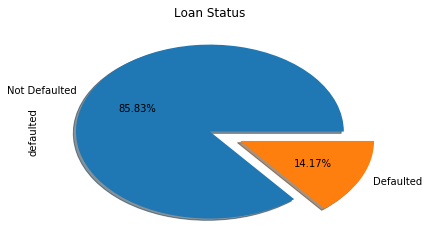

In [27]:
labels = "Not Defaulted", "Defaulted"
plt.title('Loan Status')
plt.ylabel('Condition')
credit_data['defaulted'].value_counts().plot.pie(explode = [0, 0.25], autopct = '%1.2f%%',
                                                shadow = True, labels = labels)

#### Let us check the dti ratio for the loan applicants
From the distribution plot we can see that loan applicant mostly follow a binomial distribution

In [28]:
credit_data.dti.describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

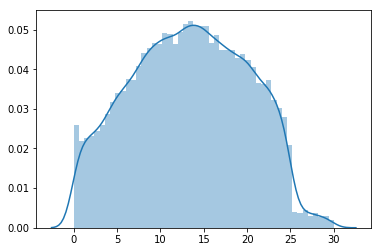

In [29]:
dti = credit_data.dti.values
sns.distplot(tuple(dti))

##### From the dti plot; we can see that it follow more or less a normal distribution

#### Let us check the annual income of the loan applicants
From the distribution plot and histogram it can be seen that the distribution of the annual income is very skewed and majority of the people have an income between 0 to 1,00,000 USD (85% of the sample data; can be clearly seen below)

In [30]:
credit_data.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

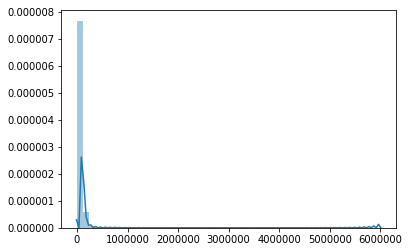

In [31]:
income = credit_data.annual_inc.values
sns.distplot(tuple(income))

(array([3.9668e+04, 4.1000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.0000e+03, 6.0360e+05, 1.2032e+06, 1.8028e+06, 2.4024e+06,
        3.0020e+06, 3.6016e+06, 4.2012e+06, 4.8008e+06, 5.4004e+06,
        6.0000e+06]),
 <a list of 10 Patch objects>)

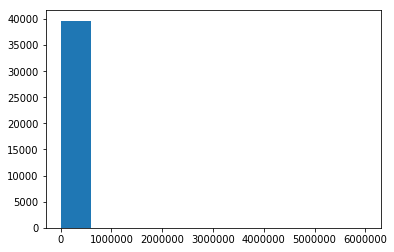

In [32]:
plt.hist(income)

In [33]:
# Let us check the 95th percentile for the annual income
np.percentile(income, 85)

100000.0

##### Let us drill down for the annual income which is less than 1,00,000 USD

In [34]:
credit_data = credit_data[credit_data['annual_inc'] <= 100000.0]

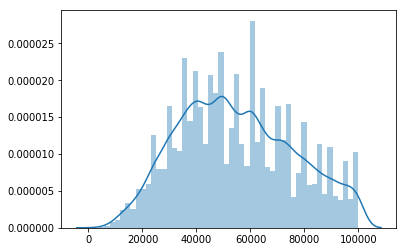

In [35]:
income = credit_data.annual_inc.values
sns.distplot(tuple(income))

##### For annual income below 100000 USD the loan data follows a pretty normal distribution; however some spikes can be seen for some values of annual_income also

In [36]:
cont=[]
cat=[]
for i in credit_data:
    if (credit_data[i].nunique()>=2 ) and (credit_data[i].dtype=='int64' or credit_data[i].dtype=='float64'):
        cont.append(i)
    else:
        cat.append(i)
print('Continuous variables are:---',cont)
print("----------------")
print('Categorical Variable are:--',cat)

Continuous variables are:--- ['loan_amnt', 'int_rate', 'installment', 'emp_len_years', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'defaulted', 'issue_d_year']
----------------
Categorical Variable are:-- ['term_months', 'grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


#### Let us check the correlation between the different variables

In [37]:
corr = credit_data.corr()

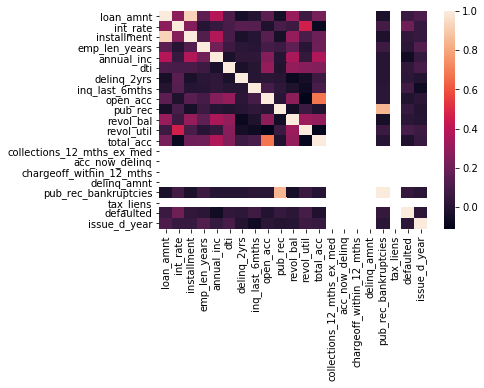

In [38]:
sns.heatmap(corr)

### Bad Loan Analysis
Let us now take only the set of loans which has gone bad(i.e. the loan dayment is defaulted) and drill down further on that data

In [39]:
defaulted_data = credit_data[credit_data['defaulted'] == 1]
good_data = credit_data[credit_data['defaulted'] == 0]
defaulted_numeric = defaulted_data.select_dtypes(exclude = ['object'])
good_numeric = good_data.select_dtypes(exclude = ['object'])

In [40]:
defaulted_data.describe()

,loan_amnt,int_rate,installment,emp_len_years,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,defaulted,issue_d_year
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,...,5035.000000,5035.000000,5035.0,5035.0,5035.0,5035.0,5035.000000,5035.0,5035.0,5035.000000
mean,11315.665343,13.683335,314.485017,4.952532,51729.966093,14.180266,0.165641,1.048461,8.915988,0.086197,...,54.937055,20.530089,0.0,0.0,0.0,0.0,0.066733,0.0,1.0,2010.368024
std,7529.196020,3.613064,199.756254,3.515776,20911.184003,6.603192,0.530338,1.146082,4.395330,0.286981,...,27.845701,11.028966,0.0,0.0,0.0,0.0,0.251170,0.0,0.0,0.888841
min,900.000000,5.420000,22.790000,0.000000,4080.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,2007.000000
25%,5000.000000,11.140000,163.705000,2.000000,36000.000000,9.250000,0.000000,0.000000,6.000000,0.000000,...,33.700000,12.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,2010.000000
50%,10000.000000,13.490000,276.760000,4.000000,50000.000000,14.500000,0.000000,1.000000,8.000000,0.000000,...,57.500000,19.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,2011.000000
75%,15250.000000,16.290000,417.280000,9.000000,65004.000000,19.540000,0.000000,2.000000,11.000000,0.000000,...,78.050000,27.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,2011.000000
max,35000.000000,24.400000,1302.690000,10.000000,100000.000000,29.850000,8.000000,8.000000,38.000000,2.000000,...,99.900000,74.000000,0.0,0.0,0.0,0.0,2.000000,0.0,1.0,2011.000000


In [41]:
good_data.describe()

,loan_amnt,int_rate,installment,emp_len_years,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,defaulted,issue_d_year
count,28995.000000,28995.00000,28995.000000,28995.000000,28995.000000,28995.000000,28995.000000,28995.000000,28995.000000,28995.000000,...,28995.000000,28995.000000,28995.0,28995.0,28995.0,28995.0,28995.000000,28995.0,28995.0,28995.000000
mean,10153.020348,11.62010,296.564691,4.784997,55385.603616,13.559059,0.137369,0.822901,9.011830,0.052802,...,47.412350,20.992999,0.0,0.0,0.0,0.0,0.040904,0.0,0.0,2010.316848
std,6616.916709,3.58353,185.688578,3.468498,21250.580478,6.703663,0.474785,1.037205,4.262013,0.232415,...,28.049489,10.878273,0.0,0.0,0.0,0.0,0.198766,0.0,0.0,0.876764
min,500.000000,5.42000,15.690000,0.000000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2007.000000
25%,5000.000000,8.59000,158.770000,2.000000,39600.000000,8.430000,0.000000,0.000000,6.000000,0.000000,...,24.000000,13.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2010.000000
50%,8800.000000,11.49000,259.530000,4.000000,54000.000000,13.710000,0.000000,0.000000,8.000000,0.000000,...,47.400000,19.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2011.000000
75%,14000.000000,13.99000,390.665000,8.000000,71000.000000,18.880000,0.000000,1.000000,11.000000,0.000000,...,70.300000,27.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2011.000000
max,35000.000000,23.91000,1269.730000,10.000000,100000.000000,29.990000,11.000000,8.000000,42.000000,4.000000,...,99.900000,87.000000,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,2011.000000


##### From the above summary data we can see that the count for bad loans is 5035 and for good loans it is 28995

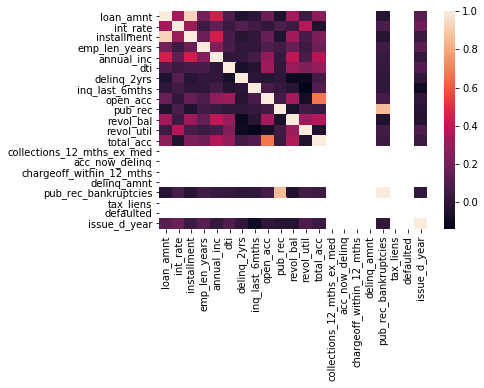

In [42]:
defaulted_corr = defaulted_numeric.corr()
sns.heatmap(defaulted_corr)

#### Loan Amount to Default Status comparison

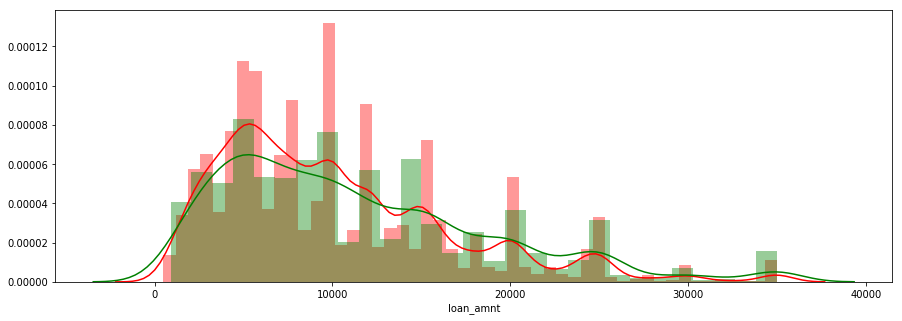

In [43]:
plt.figure(figsize=(15,5))
sns.distplot(good_data['loan_amnt'],color='r',kde=True)
sns.distplot(defaulted_data['loan_amnt'],color='g',kde=True)
plt.show()

In [44]:
print(defaulted_data.loan_amnt.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,1]))
print("---------")
print(good_data.loan_amnt.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,1]))

count     5035.000000
mean     11315.665343
std       7529.196020
min        900.000000
25%       5000.000000
50%      10000.000000
75%      15250.000000
90%      22000.000000
95%      25000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
---------
count    28995.000000
mean     10153.020348
std       6616.916709
min        500.000000
25%       5000.000000
50%       8800.000000
75%      14000.000000
90%      20000.000000
95%      24000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


#### From the above it can be seen that the amount of the loan applied for defaulters by the borrower is the range of 0-20000 and non-defaulter has applied more amount

#### Analysis based on annual income

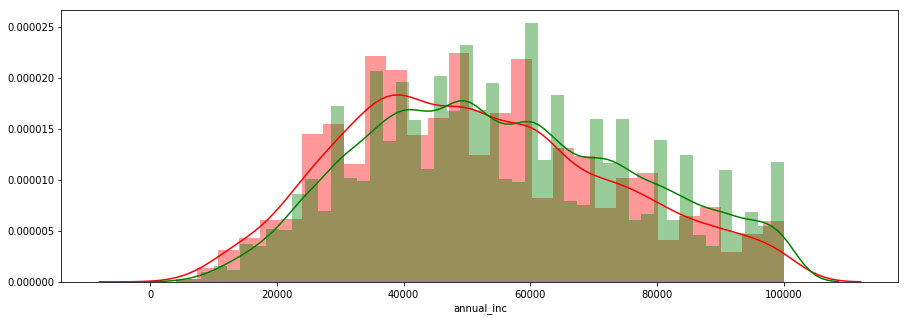

In [45]:
plt.figure(figsize=(15,5))
sns.distplot(defaulted_data['annual_inc'],color='r',kde=True)
sns.distplot(good_data['annual_inc'],color='g',kde=True)
plt.show()

In [46]:
print(defaulted_data.annual_inc.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,1]))
print("---------")
print(good_data.annual_inc.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,1]))

count      5035.000000
mean      51729.966093
std       20911.184003
min        4080.000000
25%       36000.000000
50%       50000.000000
75%       65004.000000
90%       81561.600000
95%       90000.000000
100%     100000.000000
max      100000.000000
Name: annual_inc, dtype: float64
---------
count     28995.000000
mean      55385.603616
std       21250.580478
min        4000.000000
25%       39600.000000
50%       54000.000000
75%       71000.000000
90%       85000.000000
95%       93466.800000
100%     100000.000000
max      100000.000000
Name: annual_inc, dtype: float64


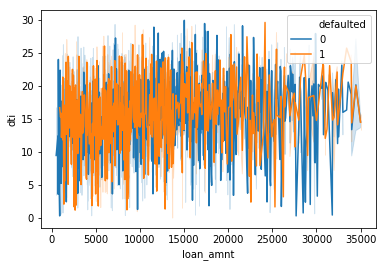

In [47]:
sns.lineplot(x='loan_amnt',y='dti',data=credit_data, hue = 'defaulted')

##### People with higher Debt to Income Ratio is a big set of defaulters

#### Bad Loan Analysis based on Home Ownership Status

In [48]:
home_status = defaulted_data.home_ownership.value_counts()
home_status = home_status / home_status.sum() * 100
home_status

RENT        52.830189
MORTGAGE    38.629593
OWN          8.202582
OTHER        0.337637
Name: home_ownership, dtype: float64

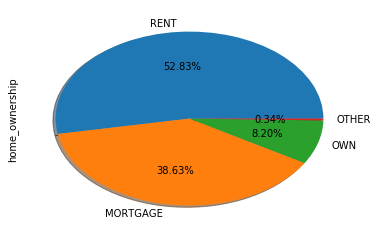

In [49]:
defaulted_data['home_ownership'].value_counts().plot.pie(autopct = "%1.2f%%", shadow = True)

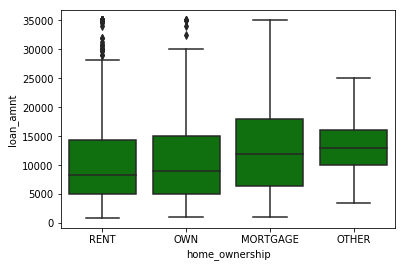

In [50]:
sns.boxplot(x = 'home_ownership', y = 'loan_amnt', data = defaulted_data, color = 'g')

##### From the above plots it can be seen that majority of the defaulters are staying in Rented Apartments. Also among the defaulters staying in rented apartments; there is a significant number of defaults for high vanlue loans.

#### Bad Loan Analysis based on Grade

In [51]:
grade_status = defaulted_data.grade.value_counts()
grade_status = grade_status / grade_status.sum() * 100
grade_status

B    25.898709
C    24.548163
D    19.801390
E    11.916584
A    11.241311
F     5.044687
G     1.549156
Name: grade, dtype: float64

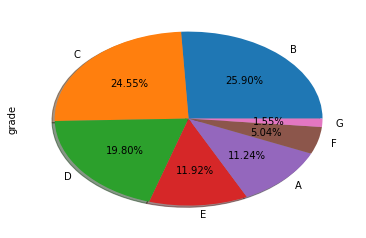

In [52]:
defaulted_data['grade'].value_counts().plot.pie(autopct = "%1.2f%%", shadow = True)

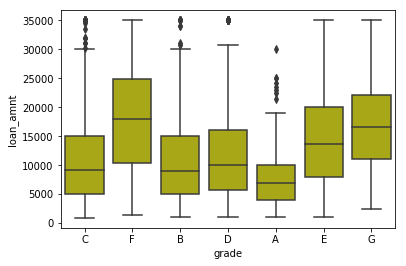

In [53]:
sns.boxplot(x = 'grade', y = 'loan_amnt', data = defaulted_data, color = 'y')

##### From the above plots it can be seen that grade B and C constitute almost 50% of the defaulters; also for Grade C defaulters there is a significant number of defaulters having high value loans

#### Let us check how the interest rates vary for Good Loans and Bad Loans
From the below plots it can be seen that there is a significant difference in the interest rates between the Bad loans and Good Loans. It can be clearly seen that the mean of the Interest rate for Bad Loans as higher by around 2%; similarly the 25 and 75 percentile for Bad Loans is higher than that of Good Loans.

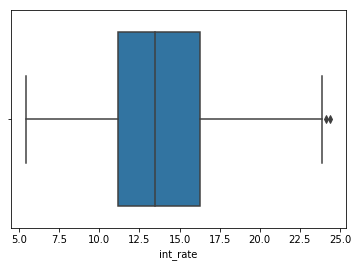

In [54]:
sns.boxplot(defaulted_data.int_rate)

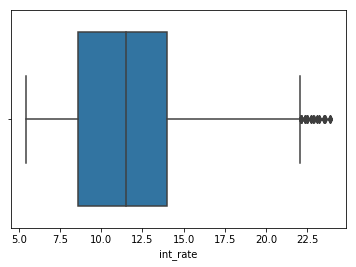

In [55]:
sns.boxplot(good_data.int_rate)

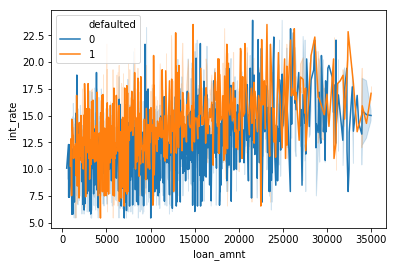

In [56]:
sns.lineplot(x='loan_amnt',y='int_rate',data=credit_data, hue = 'defaulted')

#### Analysis based on employment length

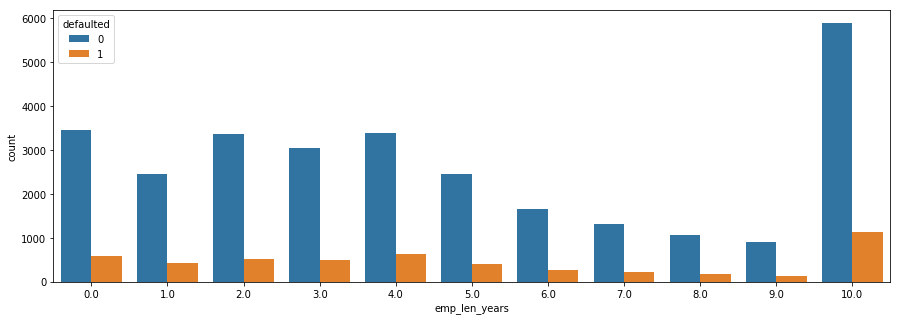

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_len_years',data=credit_data,hue='defaulted')
plt.show()

##### From the above plot it can be seen that the employment length and the default rate are inversely proportional. Also a major set of loans are provided to applicants having longer tenures of employment

#### Let us check the loan details based on address state

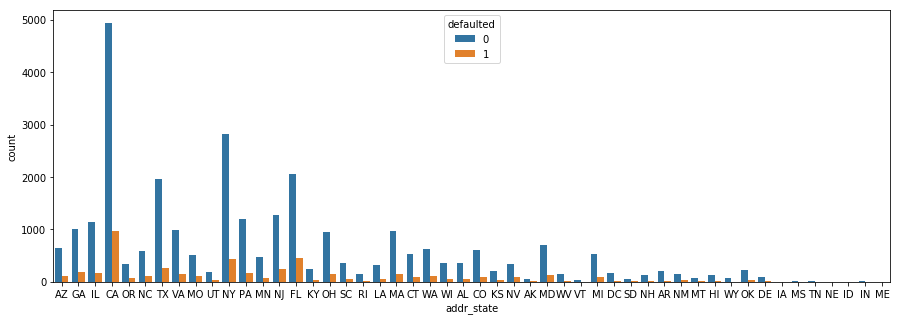

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x='addr_state',data=credit_data,hue='defaulted')
plt.show()

#### From the above graph it can be seen that:
1. Top 3 Loan States are:
    California
    New York
    Florida
2. Similarly states with maximum number of defaulters are:
    California
    New York
    Florida
    
##### However if we see the ratio of Bad Loans to Good Loans we can see that the ratio is higher in Florida and New York when compared to California. From the above we can conclude that the loans approved in Florida and New York are riskier compared to California and by extension to other states

#### Plot of Interest rate to Address State

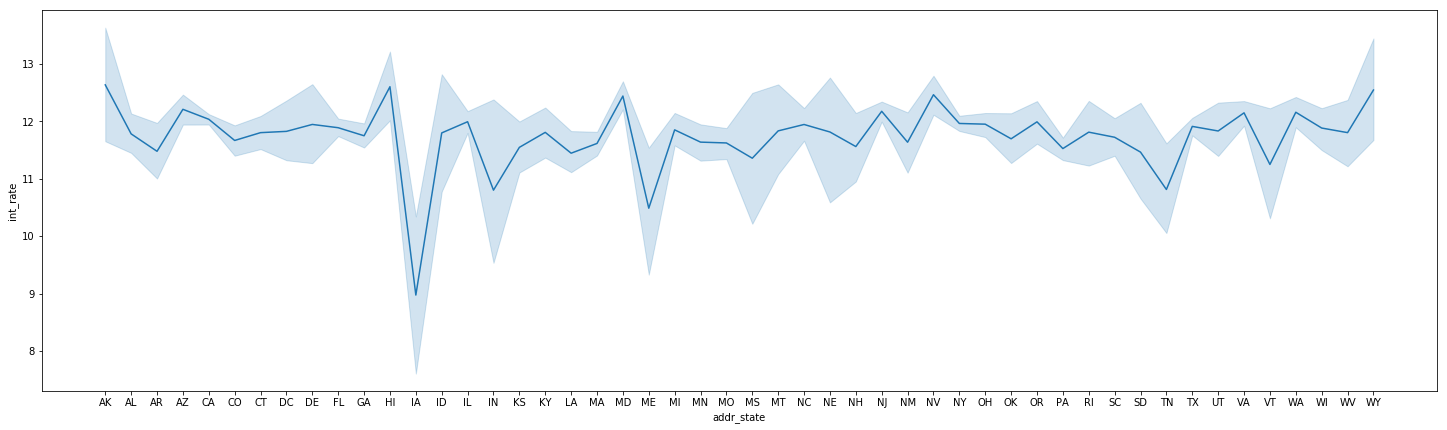

In [59]:
plt.figure(figsize=(25,7))
sns.lineplot(x='addr_state',y='int_rate',data=credit_data)
plt.show()

##### From the above plot it can be seen that the lowest interest rate is in Iowa and the highest interest rate is in Hawai

##### Also it can be seen that the states of California, New York and Florida attract interest rates on the higher side

#### Let us check the loan details based on the loan purpose

In [60]:
loan1=credit_data[['defaulted','purpose']].sort_values(by='purpose',ascending=False)

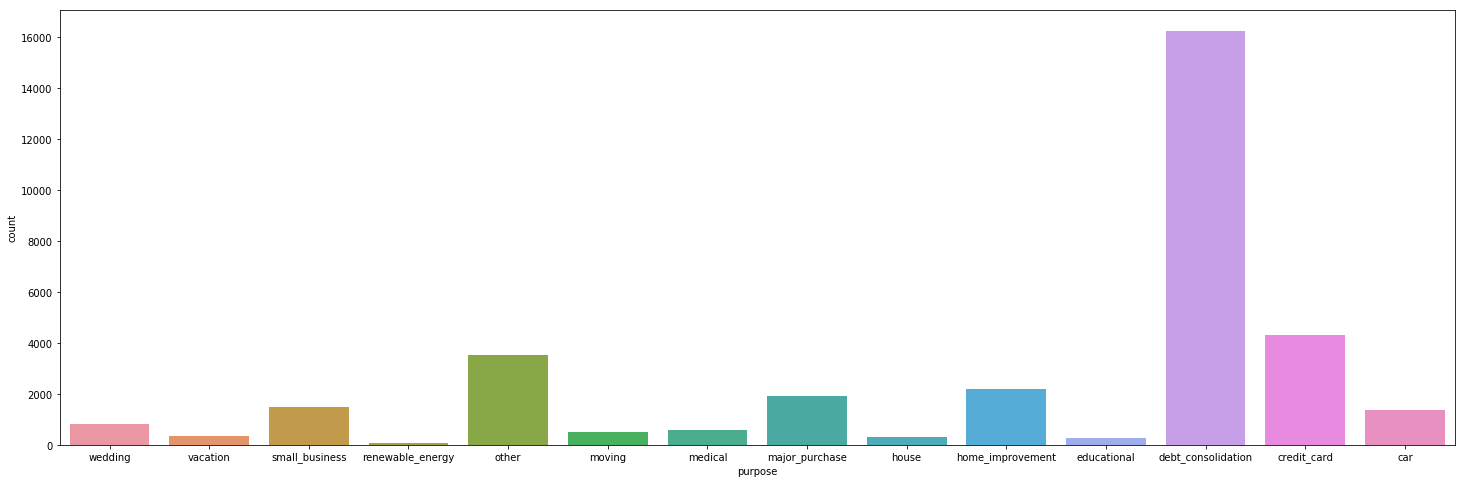

In [61]:
plt.figure(figsize=(25,8))
sns.countplot(x='purpose',data=loan1)
plt.show()

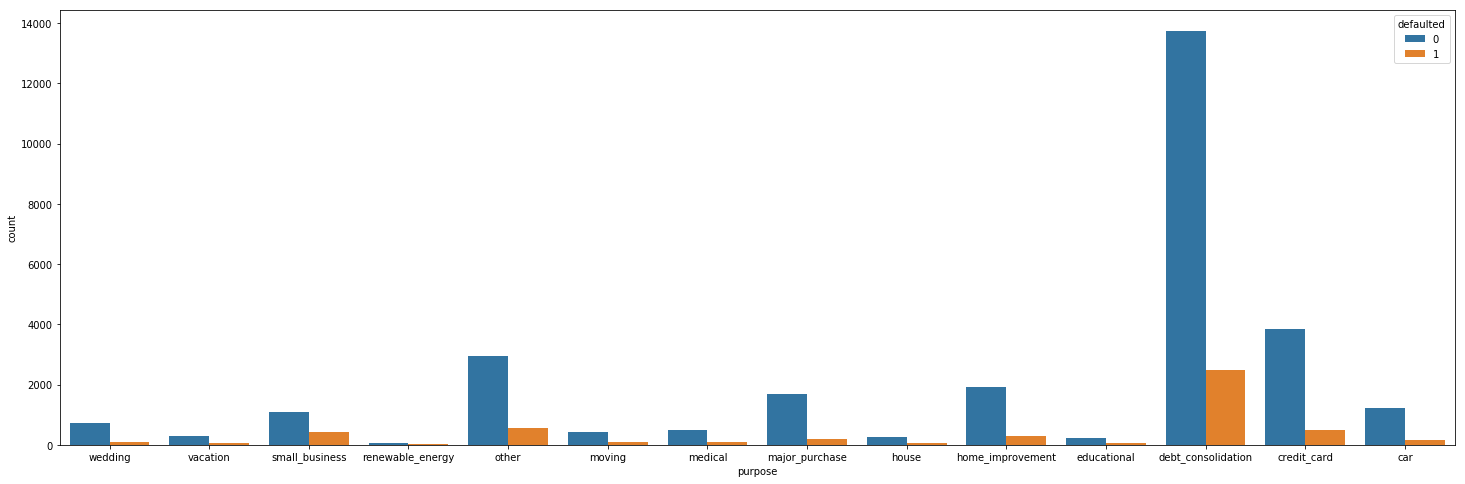

In [62]:
plt.figure(figsize=(25,8))
sns.countplot(x='purpose',data=loan1,hue='defaulted')

##### From the above plot we can clearly see that to 3 loan applicants are for 'debt_consolidation', 'credit_card'  and 'car'; whereas top 3 loan defaults are for 'debt_consolidation', 'credit_card'  and 'small_business'

#### Let us check if the loan term length has any relation to Good and Bad Loans

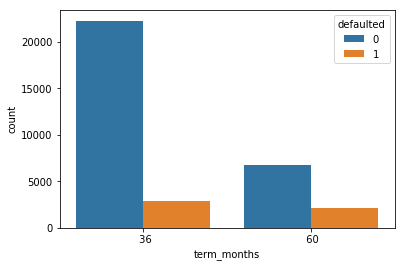

In [63]:
sns.countplot(x='term_months',data=credit_data,hue='defaulted')

##### From the above plot it can be clearly seen that loans with higher term length has a higher risk of turning into bad loans

#### Let us check if bankruptcy record  has anything to do with the loans

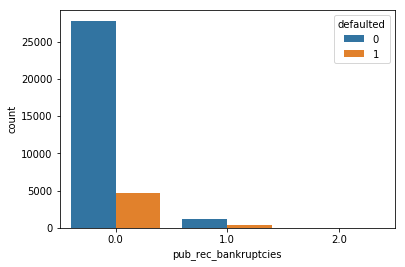

In [64]:
sns.countplot(x='pub_rec_bankruptcies',data=credit_data,hue='defaulted')

##### From the above it  can be seen that maximum number of loans are given to people with no bankruptcy record and there are no loans given to people having more than 1 bankruptcy record. Also it can be seen that the risk of loan default is higher if people have 1 bankruptcy record

In [65]:
# Let's See Number of Applicants yearly for both defaulter and non defaulter
year=credit_data['issue_d_year'].unique()
total=credit_data['issue_d_year'].count()
percent=round((credit_data['issue_d_year'].value_counts()/credit_data['issue_d_year'].count())*100,2)


dict={'year':year,
     'total_customer':total,
     'percent_increase_in_application':percent}
loan2=pd.DataFrame(dict)
loan2=loan2.sort_values(by='year',ascending=True)

In [66]:
loan2

,year,total_customer,percent_increase_in_application
2007,2007,34030,0.61
2008,2008,34030,4.03
2009,2009,34030,11.91
2010,2010,34030,29.21
2011,2011,34030,54.24


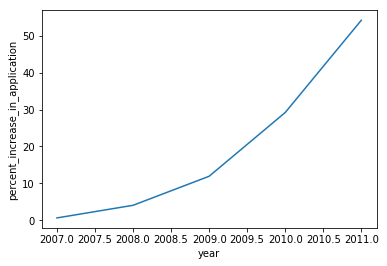

In [67]:
sns.lineplot(x='year',y='percent_increase_in_application',data=loan2)
plt.show()

##### It can be clearly seen that the interest rates have increased over a period of time from 2007 to 2011

#### Let us check for which loan purpose we are getting more interest rate

In [68]:
loan3=credit_data[['int_rate','purpose']].groupby('purpose').max().sort_values(by='int_rate',
                                                                        ascending=False).reset_index()

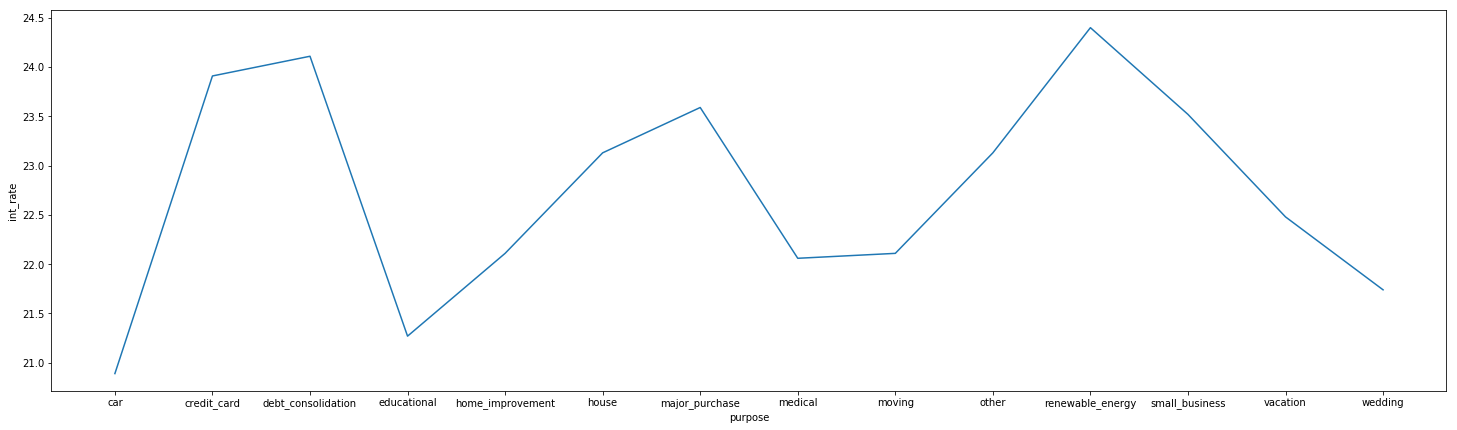

In [69]:
plt.figure(figsize=(25,7))
sns.lineplot(x='purpose',y='int_rate',data=loan3)
plt.show()

In [70]:
loan3

,purpose,int_rate
0,renewable_energy,24.40
1,debt_consolidation,24.11
2,credit_card,23.91
3,major_purchase,23.59
4,small_business,23.52
5,house,23.13
6,other,23.13
7,vacation,22.48
8,home_improvement,22.11
9,moving,22.11


### Top 5 product paying higher interest to bank are
renewable_energy, debt_consolidation, credit_card, major_purchase, small_business

## Summary

From the above analysis we can see that:
1. Applicants staying in Rented Aprtments have a higher tendency to default loans
2. Applicants with a higher employment length have a lower tendency to default loans
3. Applicants with a loan purpose of 'Debt_consolidation' have a very high loan default rates
4. The Term Length of the loan also contributes to the loan default
5. Bankruptcy record can be seen a directly related to loan default
6. A big chunk of defaulters are coming from California, New York and Florida
7. The higher the interest rate; higher the chances of default
8. People with higher Debt to Income Ratio is a big set of defaulters

From the above we can consider the following as driver variables to while checking the loan applications and deciding whether to approve the loan or not and what should be the rate of interest for the same if approved.

1. home_ownership
2. emp_length
3. int_rate
4. term
5. pub_rec_bankruptcies
6. addr_state
7. dti
8. purpose